In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

# Assignment

## Instructions

Complete the following exercises using Python.

#### 1. 
Linear Regression Exercise:
   Using the California Housing dataset from scikit-learn, create a linear regression model to predict house prices.
   Evaluate the performance of Linear Regression on test set.

In [2]:
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()

df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


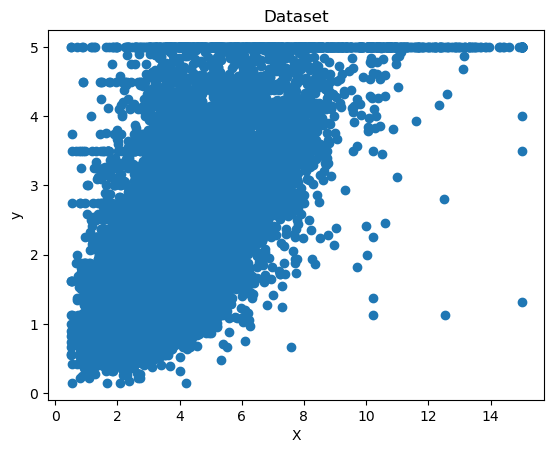

In [3]:
X = housing.data
y = housing.target

plt.scatter(df[['MedInc']], y)
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
# Split data 80-20 and reshape inputs for scikit-learn compatibility.

X_train, X_test, y_train, y_test = train_test_split(
                                   X, 
                                   y, 
                                   test_size=0.2,
                                   random_state=0)

#X_train = X_train.values.reshape(-1, 1)
#X_test = X_test.values.reshape(-1, 1)

print("Train shape:", X_train.shape)
print("Test shape : ", X_test.shape)

Train shape: (16512, 8)
Test shape :  (4128, 8)


In [5]:
# Train (fit) the model using the training data

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to quantify prediction accurary (lower is better)
# Calculate R-squared (R2) to measure how well the independent variables explain the variance (closer to 1 is better)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score         :", r2)

Mean Squared Error: 0.5289841670367247
R^2 Score         : 0.5943232652466173


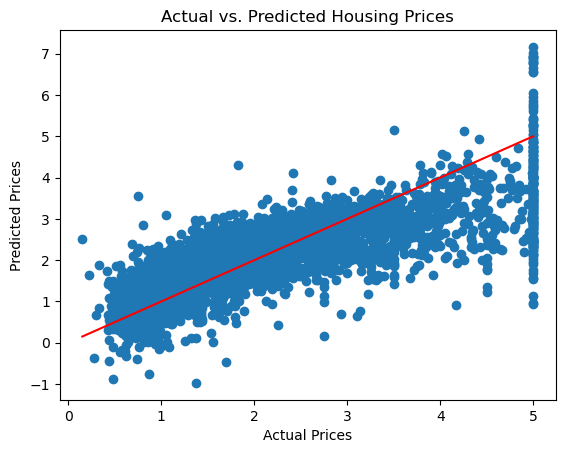

In [6]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices')
plt.show()

#### 2. 
Classification Exercise:
   Using the breast cancer dataset from scikit-learn, build classification models to predict malignant vs benign tumors.
   Compare Logistic Regression and KNN performance on test set.

In [7]:
from sklearn.datasets import load_breast_cancer

# Load dataset
cancer = load_breast_cancer()

df2 = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
X = cancer.data
y = cancer.target

# Split the data into training (70%) and testing (30%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the Logistic Regression model

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model on the test set.

print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy:  0.9590643274853801


In [9]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-NN Accuracy: ", accuracy_score(y_test, y_pred_knn))

K-NN Accuracy:  0.9473684210526315
